<a href="https://colab.research.google.com/github/Niki-KR/TMO/blob/master/notebooks/%D0%A0%D0%9A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#РК №1, ИУ5-63Б, Кривцов Н.А., Вариант 10

---

Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?
Для произвольной колонки данных постройте график "Ящик с усами (boxplot)".



# Разведочный анализ данных

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv("drive/My Drive/Colab Notebooks/dc-wikia-data.csv")

In [0]:
# Типы признаков
df.dtypes

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
YEAR                float64
dtype: object

In [0]:
# Размерность датасета
df.shape

(6896, 13)

Все признаки, за исключением `APPEARANCES`, `YEAR` и `page_id` являются категориальаными.

In [0]:
# Проверка на пропуски в данных
df.isnull().sum()

page_id                0
name                   0
urlslug                0
ID                  2013
ALIGN                601
EYE                 3628
HAIR                2274
SEX                  125
GSM                 6832
ALIVE                  3
APPEARANCES          355
FIRST APPEARANCE      69
YEAR                  69
dtype: int64

# Обработка пропусков

Для категориального признака `GSM` значения отсутсвуют почти во всех записях! Признак следует удалить из датасета целиком за его ненадобностью.

In [0]:
# Удаление признака GSM
df1 = df.drop(labels="GSM", axis=1)
df1.isnull().sum()

page_id                0
name                   0
urlslug                0
ID                  2013
ALIGN                601
EYE                 3628
HAIR                2274
SEX                  125
ALIVE                  3
APPEARANCES          355
FIRST APPEARANCE      69
YEAR                  69
dtype: int64

Для количественного признака `Year` (отсутвующих значений - 1%) сгенерируем описательную статистику, а также построим `boxplot`, чтобы подобрать наиболее подходящую стратегию обработки пропусков.

In [0]:
df1['YEAR'].describe()

count    6827.000000
mean     1989.766662
std        16.824194
min      1935.000000
25%      1983.000000
50%      1992.000000
75%      2003.000000
max      2013.000000
Name: YEAR, dtype: float64

In [0]:
df1['YEAR'].value_counts()

2006.0    303
1988.0    286
2010.0    279
1989.0    266
1987.0    254
         ... 
1952.0      5
1937.0      4
1935.0      1
1953.0      1
2013.0      1
Name: YEAR, Length: 79, dtype: int64

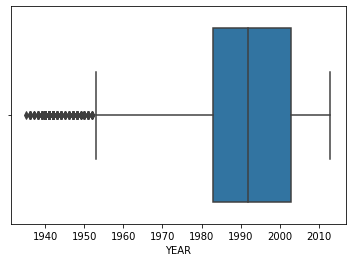

In [0]:
sns.boxplot(x=df1['YEAR'])

Половина всех значений признака лежит на отрезке [1983, 2003]. Медиана признака `YEAR` равна 1992.

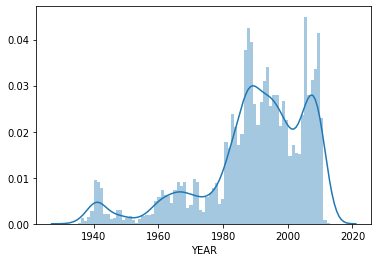

In [0]:
sns.distplot(df1['YEAR'], bins=79)

Заполним пропуски медаинным значением.

In [0]:
# Медиана
med = df1['YEAR'].median()

In [0]:
df1['YEAR'].tail()

6891   NaN
6892   NaN
6893   NaN
6894   NaN
6895   NaN
Name: YEAR, dtype: float64

In [0]:
# Заполнение пропусков
df1['YEAR'] = df1['YEAR'].fillna(value=med)
df1['YEAR'].tail()

6891    1992.0
6892    1992.0
6893    1992.0
6894    1992.0
6895    1992.0
Name: YEAR, dtype: float64